In [ ]:
%pip install ruptures

In [ ]:
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt

In [ ]:
n = 1000
n_simulations = 100
margin = 3  # Margin for successful detection
success_count = 0
changepoint_locations = []
np.random.seed(42)

## Problem 2 (When the number of chasngepoints are unknown and there is a penalty term)

In [ ]:
for _ in range(n_simulations):
    # Randomly selecting the changepoint location in an iteration
    true_changepoint = np.random.randint(100, n-100)

    # Generating the time series
    signal = np.concatenate([
        np.random.normal(1, 1, true_changepoint),  # Segment 1 (mean=1)
        np.random.normal(2, 1, n - true_changepoint)  # Segment 2 (mean=2)
    ])

    # PELT algorithm (Pruned Exact Linear Time) algorithm) with L2 Norm as Cost Function
    algo = rpt.Pelt(model="l2").fit(signal)
    result = algo.predict(pen=10)

    detected_changepoint = result[0] if result else None
    changepoint_locations.append(detected_changepoint)

    # If the detected changepoint is within the margin
    if detected_changepoint and abs(detected_changepoint - true_changepoint) <= margin:
        success_count += 1

# Calculate success rate
success_rate = success_count / n_simulations

# Print the success rate
print(f"Success Rate: {success_rate * 100:.2f}%")
print(f"Success Rate: {success_count} / {n_simulations}")

Success Rate: 138.00%
Success Rate: 138 / 100


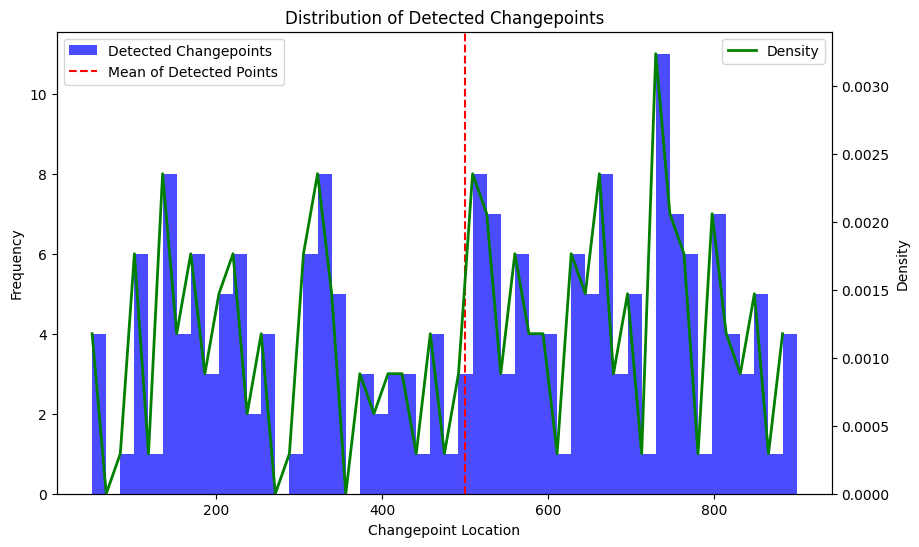

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
plt.hist(changepoint_locations, bins=50, alpha=0.7, color='blue', label='Detected Changepoints')
plt.axvline(x=np.mean(changepoint_locations), color='red', linestyle='--', label='Mean of Detected Points')
plt.title('Distribution of Detected Changepoints')
plt.xlabel('Changepoint Location')
plt.ylabel('Frequency')
plt.legend()

# Overlay a density plot
plt.twinx()
density, bins, _ = plt.hist(changepoint_locations, bins=50, density=True, alpha=0)
plt.plot(bins[:-1], density, color='green', label='Density', linestyle='-', linewidth=2)
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

## Problem 1 (Number of changepoints are known)

In [ ]:
n = 1000
n_simulations = 100
margin = 3  # Margin for successful detection
success_count = 0
changepoint_locations = []
np.random.seed(42)

In [ ]:
# Run the simulations
for _ in range(n_simulations):
    # Randomly select the changepoint location
    true_changepoint = np.random.randint(100, n-100)

    # Generating the data (normal distribution)
    signal = np.concatenate([
        np.random.normal(1, 1, true_changepoint),  # Segment 1 (mean=1)
        np.random.normal(2, 1, n - true_changepoint)  # Segment 2 (mean=2)
    ])

    # Search Method : Binary Segmentation algorithm , Cost Function : L2 Norm
    algo = rpt.Binseg(model="l2").fit(signal)
    result = algo.predict(n_bkps=1)  # Expecting only 1 changepoint

    # Store the detected changepoint
    detected_changepoint = result[0] if result else None
    changepoint_locations.append(detected_changepoint)

    # Check if the detected changepoint is within the margin
    if detected_changepoint and abs(detected_changepoint - true_changepoint) <= margin:
        success_count += 1

success_rate = success_count / n_simulations

print(f"Success Rate: {success_rate * 100:.2f}%")
print(f"Success Rate: {success_count} / {n_simulations}")

Success Rate: 69.00%
Success Rate: 69 / 100


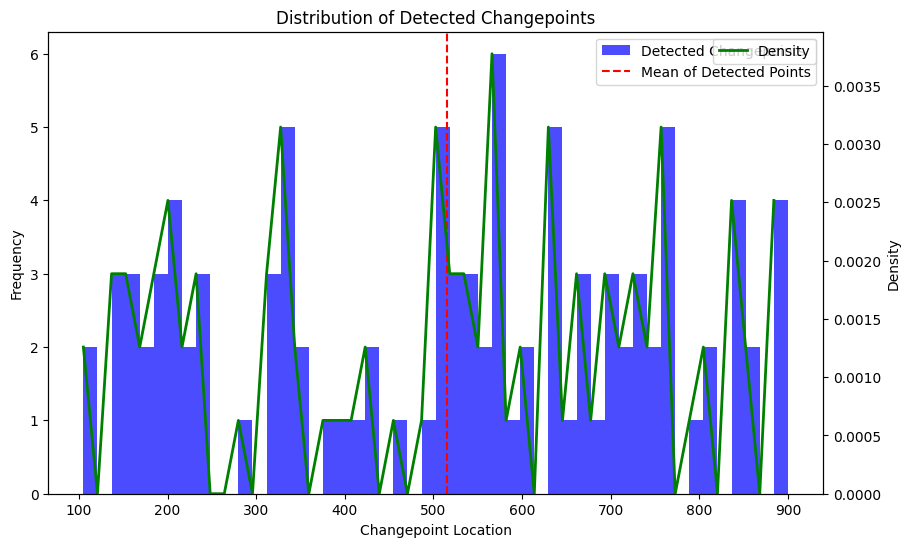

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(changepoint_locations, bins=50, alpha=0.7, color='blue', label='Detected Changepoints')
plt.axvline(x=np.mean(changepoint_locations), color='red', linestyle='--', label='Mean of Detected Points')
plt.title('Distribution of Detected Changepoints')
plt.xlabel('Changepoint Location')
plt.ylabel('Frequency')
plt.legend()

plt.twinx()
density, bins, _ = plt.hist(changepoint_locations, bins=50, density=True, alpha=0)
plt.plot(bins[:-1], density, color='green', label='Density', linestyle='-', linewidth=2)
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()